In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, BasicAer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Loading your IBM Q account(s)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education')
backend =provider.get_backend('ibmq_qasm_simulator')

In [3]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [4]:
circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

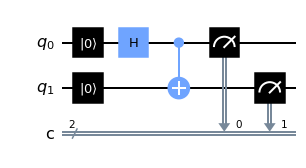

In [5]:
circuit.draw('mpl')

In [6]:
shots = 8192
job = execute(circuit, backend=backend, shots=shots)
result = job.result()

In [7]:
counts = result.get_counts(circuit)
print(counts)

{'00': 4034, '11': 4158}


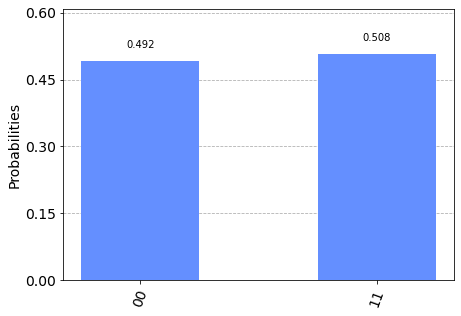

In [8]:
plot_histogram(counts)

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright